In [ ]:
import openai
import os
from dotenv import load_dotenv

load_dotenv()
# openai.api_key = ""
completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)


{
  "role": "assistant",
  "content": "In the realm of code, where lines entwine,\nThere lies a concept quite divine.\nRecursion, a loop beyond compare,\nA poetic dance in algorithm's lair.\n\nLike a mirror reflecting its own grace,\nA function calls upon itself to embrace.\nThrough layers deep, it journeys on,\nUntil its task and duty are fully drawn.\n\nWith elegance and order it unwinds,\nSolving problems of all kinds.\nSplitting and merging, it weaves its spell,\nIn a recursive symphony, it excels.\n\nYet beware of infinite loops that bind,\nFor without a base case, chaos you'll find.\nIn the dance of recursion, wisdom prevails,\nAs algorithms dance in looping trails.\n\nSo embrace this concept, wild and free,\nIn the world of programming, a sight to see.\nRecursion, a pattern sublime and true,\nIn coding's art, it will guide you through.",
  "refusal": null
}


In [9]:
# load data
import numpy as np
import os
from sklearn.model_selection import train_test_split

paths = ["/home/mengjingliu/Vid2Doppler/data/2023_07_19/HAR2", "/home/mengjingliu/Vid2Doppler/data/2023_11_17/HAR3", "/home/mengjingliu/Vid2Doppler/data/2023_07_19/HAR4", 
         "/home/mengjingliu/Vid2Doppler/data/2023_07_19/HAR5", "/home/mengjingliu/Vid2Doppler/data/2023_07_19/HAR6"]

X_real = []
y_real = []

for path in paths:
    if len(X_real) == 0:
        X_real = np.load(os.path.join(path, "X_4.npy"))
        y_real = np.load(os.path.join(path, "Y_4.npy")) - 1
    else:
        X_real = np.vstack((np.load(os.path.join(path, "X_4.npy")), X_real))
        y_real = np.concatenate((np.load(os.path.join(path, "Y_4.npy")) - 1, y_real))

X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

In [4]:
labels = ["push", "circle", "sit", "stand", "step"]

sit


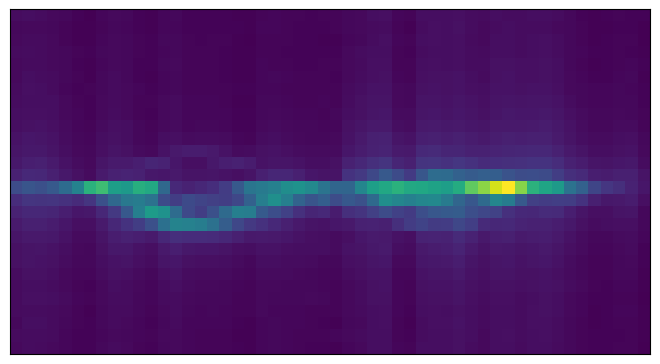

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

i  = 580
# no colorbar, tickes, labels
print(labels[int(y_train[i])])
plt.imshow(X_train[i])
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

In [22]:
from skimage.transform import resize

# Provide the data samples along with the labels/outputs directly in your code.
data_samples = [
    {
        "input": X_train[0],
        # "chain_of_thought": "The patient has multiple symptoms typically associated with viral infections.",
        "expected_output": "push"
    },
    {
        "input": X_train[100],
        # "chain_of_thought": "Blank screens and crashes often indicate software bugs or memory issues.",
        "expected_output": "stand up"
    },
    {
        "input": X_train[200],
        # "chain_of_thought": "Blank screens and crashes often indicate software bugs or memory issues.",
        "expected_output": "step"

    },
    {
        "input": X_train[300],
        # "chain_of_thought": "Blank screens and crashes often indicate software bugs or memory issues.",
        "expected_output": "circle"
    },
    {
        "input": X_train[580],
        # "chain_of_thought": "Blank screens and crashes often indicate software bugs or memory issues.",
        "expected_output": "sit down"
    }
]

for i in range(5):
    # Interpolate the input data to 64x64
    data_samples[i]["input"] = resize(data_samples[i]["input"], (64, 64), anti_aliasing=True)
    plt.imsave(f"input_{i}.png", data_samples[i]["input"])

In [ ]:
for i in range(5):
    with open(f"input_{i}.png", "rb") as image_file:
        response = openai.Image.create_variation(
            image=image_file,
            model="dall-e-2",
            # prompt="classify the activity described in the image. The possible activities are: push, circle, sit, stand, step",
            # size="1024x1024"
        )
    print(response)

{
  "created": 1730267148,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-SmggLplGOfB43rK3zj8ozgUv/user-hu0fNNnLjqMenxHCisNo30aE/img-deFXjECL2vWWRjEaZB7CwcLN.png?st=2024-10-30T04%3A45%3A48Z&se=2024-10-30T06%3A45%3A48Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-10-30T00%3A21%3A40Z&ske=2024-10-31T00%3A21%3A40Z&sks=b&skv=2024-08-04&sig=d9ak7uuSedptwwGTM/0T92qywy4GYM%2BQ%2BtqhbaS9d5U%3D"
    }
  ]
}
{
  "created": 1730267161,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-SmggLplGOfB43rK3zj8ozgUv/user-hu0fNNnLjqMenxHCisNo30aE/img-6QSOVnQXMU5kQ9Nzu6vSUgXk.png?st=2024-10-30T04%3A46%3A01Z&se=2024-10-30T06%3A46%3A01Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-10-30T00%3A16%3A42Z&ske=2024-10-31T00%3A

KeyboardInterrupt: 